##Water quality Dataset
#Context
This is a set of data created from imaginary data of water quality in an urban environment. I recommend using this dataset for educational purposes, for practice and to acquire the necessary knowledge.







In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# dealing with the imbalance, we will over sample the datas
from imblearn.over_sampling import RandomOverSampler
ran = RandomOverSampler()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
import kagglehub
from os import path
# Download latest version
path=kagglehub.dataset_download("mssmartypants/water-quality")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/water-quality


In [ ]:
# Load DataFrame
df = pd.read_csv(f"{path}/waterQuality1.csv")
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
# Observe Error
pd.to_numeric(df["ammonia"])

ValueError: Unable to parse string "#NUM!" at position 7551

In [ ]:
# Counting "#NUM!" Value
df[df['ammonia'] == "#NUM!"]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [ ]:
# Removing "#NUM!" Value Rows
df= df[df['ammonia'] != "#NUM!"]
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
# Converting columns value into numeric
df["ammonia"] = pd.to_numeric(df["ammonia"])
df["is_safe"] = pd.to_numeric(df["is_safe"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [ ]:
# Checking Safe Values in aluminium columns
df[df["is_safe"]==1]["aluminium"]

,aluminium
0,1.65
1,2.32
3,1.36
4,0.92
5,0.94
...,...
7994,0.05
7995,0.05
7996,0.09
7997,0.01


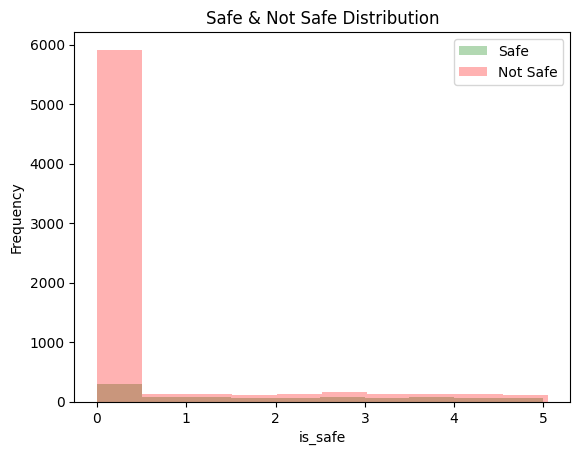

In [ ]:
# Ploting Safe and Not-Safe HistPlot for Aluminium

plt.hist(df[df["is_safe"]==1]["aluminium"],color="g",alpha=0.3,label="Safe")
plt.hist(df[df["is_safe"]==0]["aluminium"],color="r",alpha=0.3,label="Not Safe")
plt.title("Safe & Not Safe Distribution")
plt.xlabel("is_safe")
plt.ylabel("Frequency")
plt.legend()
plt.show()

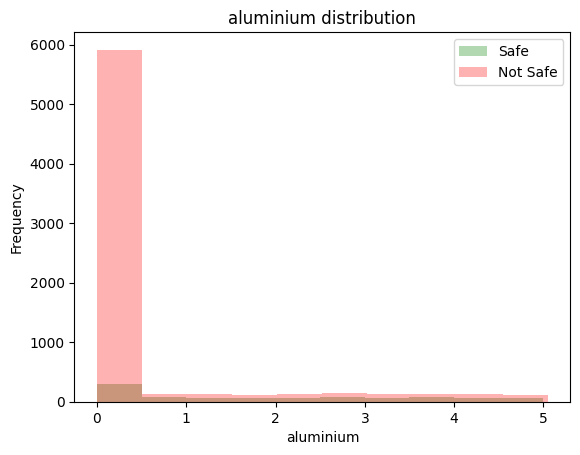

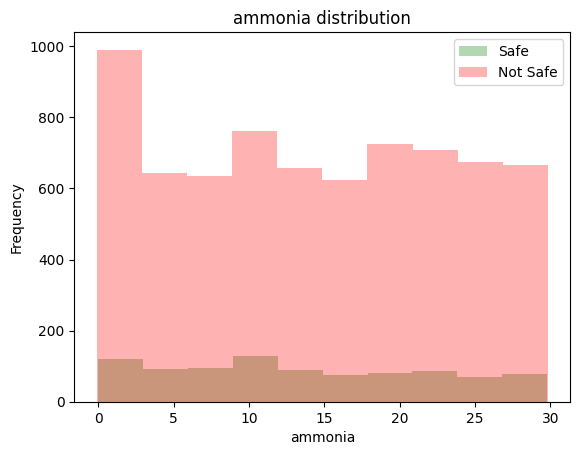

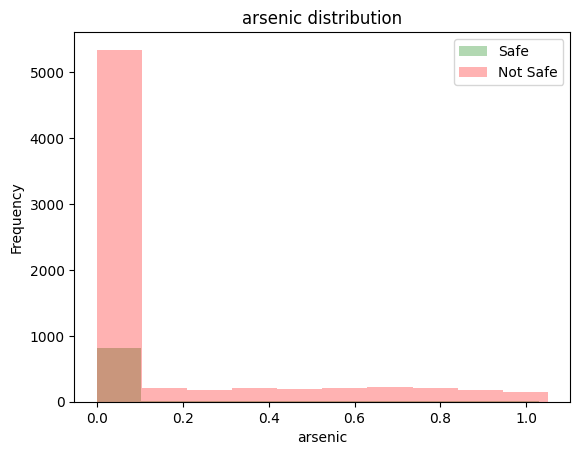

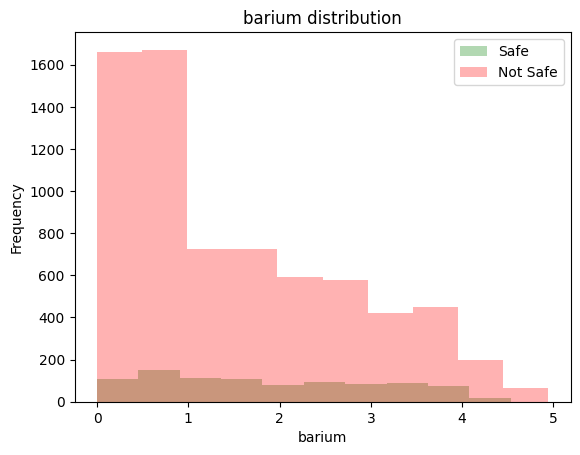

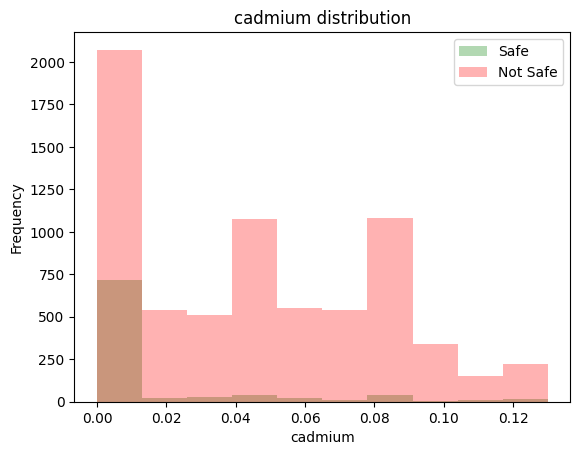

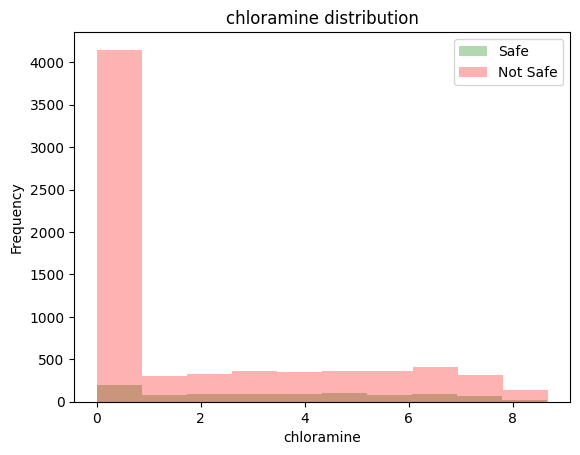

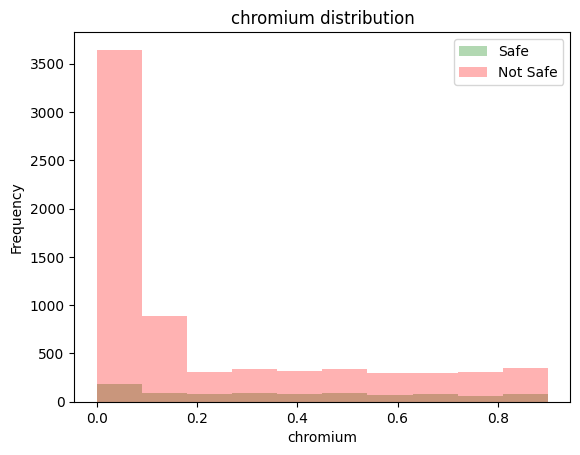

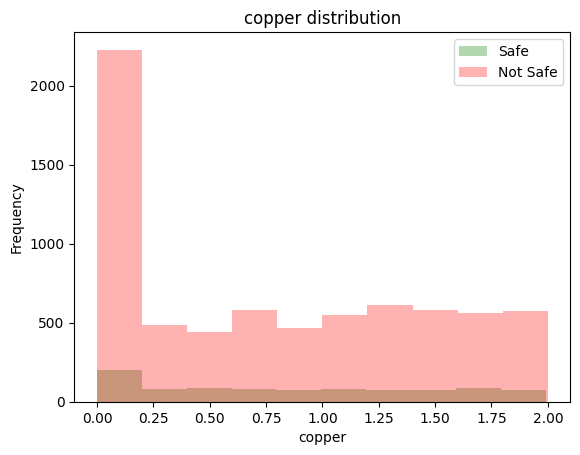

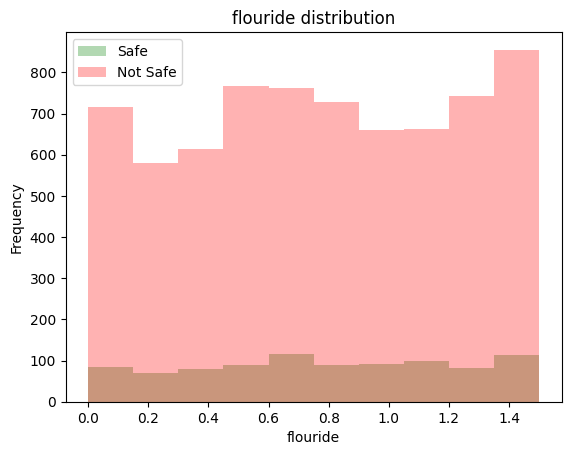

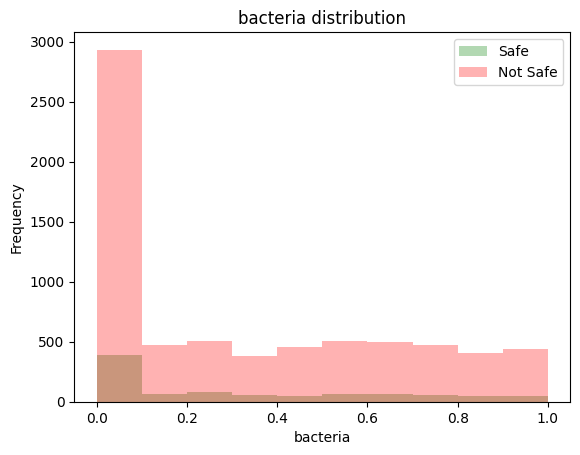

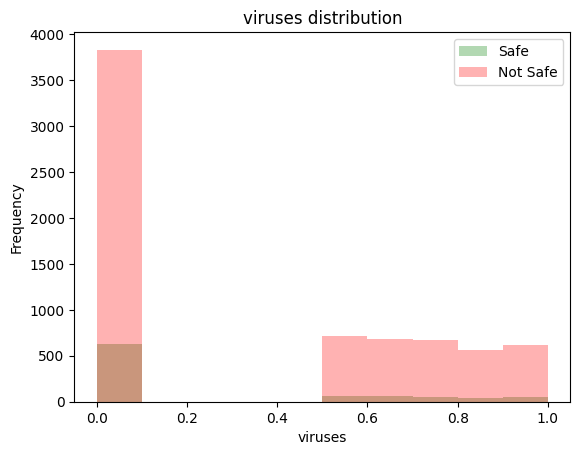

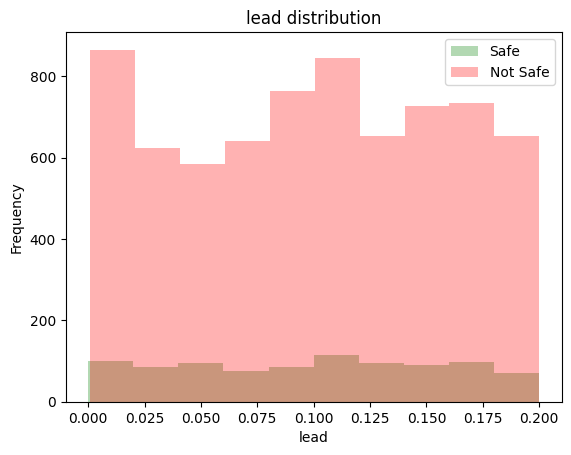

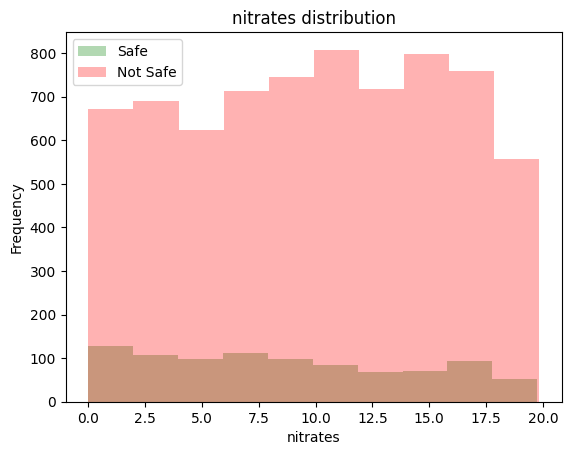

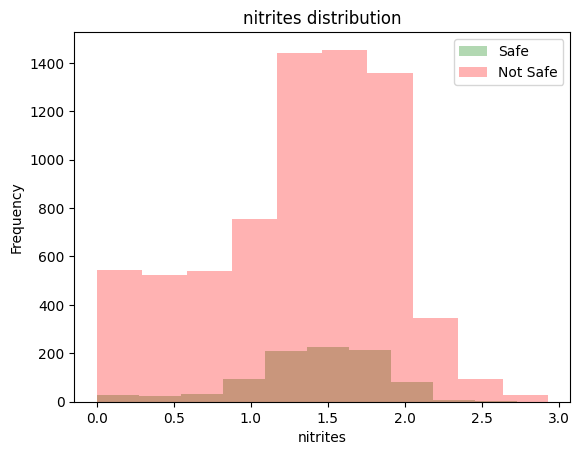

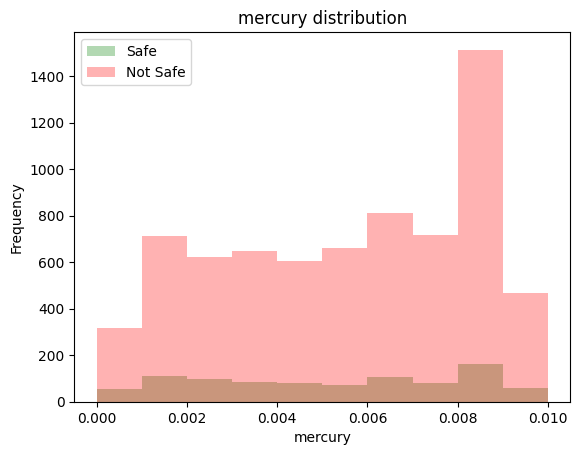

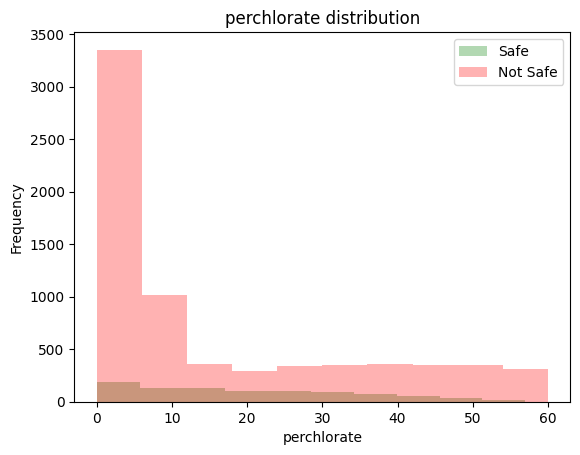

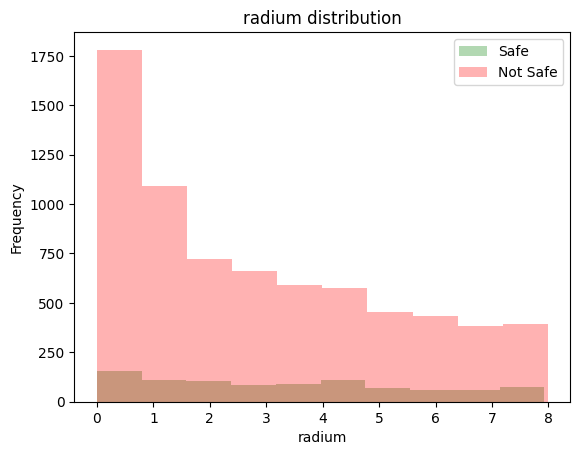

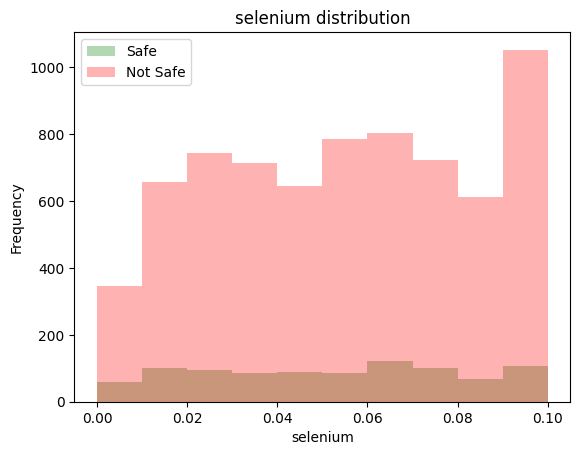

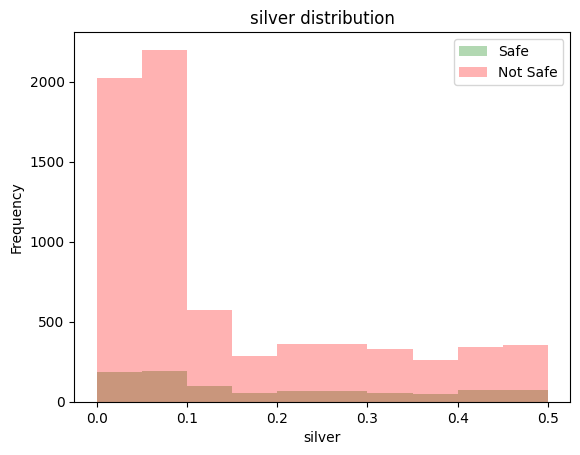

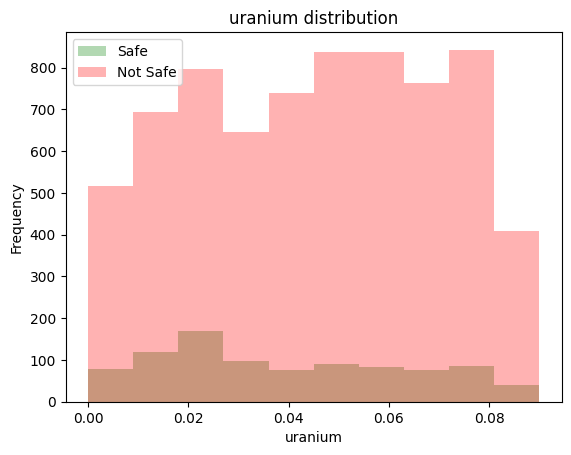

In [ ]:
# Graph for each Columns
for col in df.columns[:-1]:
  plt.hist(df[df['is_safe'] == 1][col],color = 'g',alpha = 0.3,label = "Safe")
  plt.hist(df[df['is_safe'] == 0][col],color = 'r',alpha = 0.3, label = "Not Safe")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(col + " distribution")
  plt.legend()
  plt.show()


In [ ]:
# For safe Dataframe
len(df[df["is_safe"] == 1])

912


In [ ]:
# For not safe Dataframe
len(df[df["is_safe"] == 0])

7084

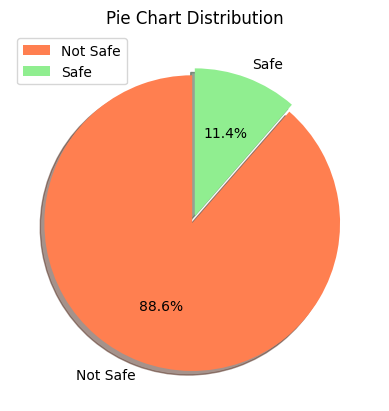

In [ ]:
# Ploting Pie Chart Distribution
plt.pie([len(df[df["is_safe"] == 0]),len(df[df["is_safe"] == 1])],autopct='%1.1f%%',colors=["coral", "lightgreen"],
        labels=["Not Safe","Safe"],startangle=90,shadow=True,explode = (0.05, 0))
plt.title("Pie Chart Distribution")
plt.legend()
plt.show()

In [ ]:
# Creating x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Model
ran = RandomOverSampler()

x_resampled, y_resampled = ran.fit_resample(x,y)

In [ ]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=12)

In [ ]:
# Model

water_classifier = RandomForestClassifier(n_estimators=10,random_state=18)
water_classifier.fit(x_train,y_train)
y_pred = water_classifier.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred),"😱")

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1404
           1       0.97      1.00      0.99      1430

    accuracy                           0.99      2834
   macro avg       0.99      0.99      0.99      2834
weighted avg       0.99      0.99      0.99      2834
 😱
